# Predict New Data - India Telecom Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
warnings.filterwarnings("ignore")

In [2]:
# Function to Load the dataset
def load_and_prepare_data(file_path):
    """
    Loads and prepares new data for prediction
    """
    print("📥 Loading new data...")
    df = pd.read_csv(file_path)
    
    # Save customer IDs
    customer_ids = df['Customer_ID'].copy()
    
    # Drop unnecessary columns
    columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
    df = df.drop(columns=columns_to_drop)
    
    print(f"📊 Data shape: {df.shape}")
    return df, customer_ids

In [3]:
# Function to make predictions
def make_predictions(model, data):
    """
    Makes predictions using the best trained model
    """
    print("\n🔮 Making predictions...")
    predictions = model.predict(data)
    probabilities = model.predict_proba(data)[:, 1]
    return predictions, probabilities

In [4]:
# Function to create results DataFrame
def create_results_dataframe(original_data, customer_ids, predictions, probabilities):
    """
    Creates a DataFrame with results
    """
    results = pd.DataFrame()
    results["Customer_ID"] = customer_ids
    results["Churn_Prediction"] = predictions
    results["Churn_Probability"] = probabilities

    results["Churn_Status"] = results["Churn_Prediction"].map(
        {0: "Likely to Stay", 1: "Likely to Churn"}
    )

    results = pd.concat([results, original_data], axis=1)
    return results

In [5]:
# Function to analyze predictions
def analyze_predictions(results):
    """
    Analyzes and visualizes prediction results
    """
    print("\n📊 Prediction Analysis:")

    pred_dist = results["Churn_Status"].value_counts()
    print("\nChurn Prediction Distribution:")
    print(pred_dist)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Pie chart
    colors = ["#2ecc71", "#e74c3c"]
    pred_dist.plot(kind="pie", autopct="%1.1f%%", ax=ax1, colors=colors)
    ax1.set_title("Distribution of Churn Predictions")

    # Histogram
    sns.histplot(data=results, x="Churn_Probability", bins=30, ax=ax2)
    ax2.axvline(x=0.7, color="r", linestyle="--", label="High Risk Threshold (0.7)")
    ax2.set_title("Distribution of Churn Probabilities")
    ax2.set_xlabel("Probability of Churn")
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print("\nSummary Statistics:")
    print(f"Total Customers: {len(results)}")
    print(f"Predicted to Churn: {len(results[results['Churn_Prediction'] == 1])}")
    print(
        f"High Risk Customers (>70% probability): {len(results[results['Churn_Probability'] > 0.7])}"
    )

In [6]:
# Load and prepare data
file_path = "../data/output/prod_customer_data_new_customers.csv"
new_data, customer_ids = load_and_prepare_data(file_path)

# Save original data for reference
original_data = new_data.copy()

📥 Loading new data...
📊 Data shape: (405, 28)


In [7]:
# Load the best model
print("\n🤖 Loading best model (Logistic Regression)...")
models_dir = "../models"
model_path = os.path.join(models_dir, "logistic_regression_model.pkl")
best_model = joblib.load(model_path)

# Make predictions
predictions, probabilities = make_predictions(best_model, new_data)

# Create results DataFrame
results = create_results_dataframe(
    original_data, customer_ids, predictions, probabilities
)

# Save predictions
output_path = "../data/output/predictions.csv"
results.to_csv(output_path, index=False)
print(f"\n💾 Predictions saved to: {output_path}")


🤖 Loading best model (Logistic Regression)...

🔮 Making predictions...

💾 Predictions saved to: ../data/output/predictions.csv



📊 Prediction Analysis:

Churn Prediction Distribution:
Churn_Status
Likely to Stay     239
Likely to Churn    166
Name: count, dtype: int64


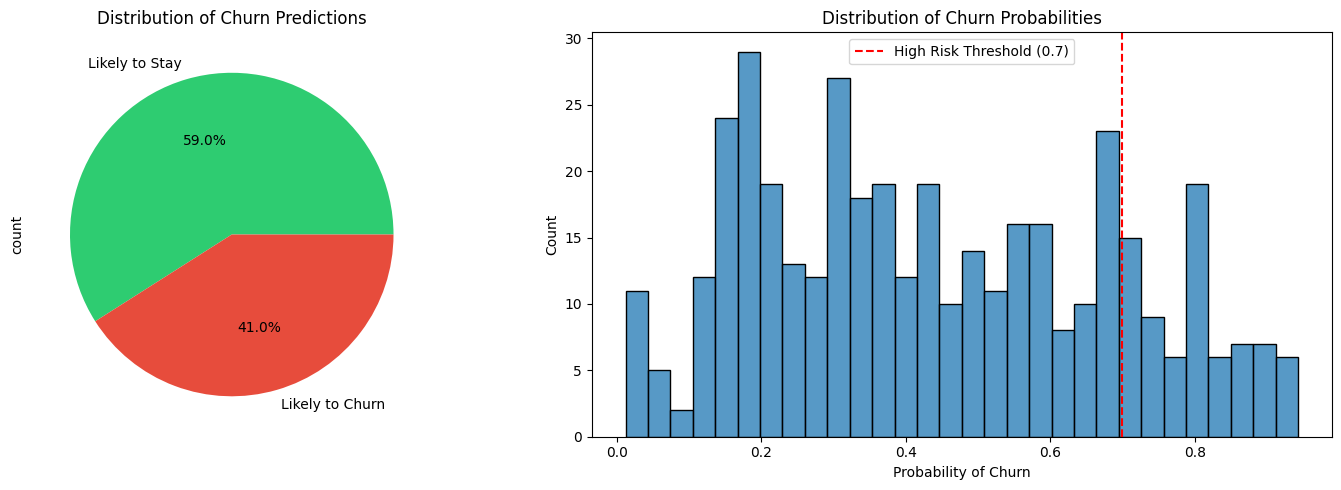


Summary Statistics:
Total Customers: 405
Predicted to Churn: 166
High Risk Customers (>70% probability): 70

⚠️ High Risk Customers (Churn Probability > 0.7):


,Customer_ID,Churn_Probability,Churn_Status
155,97828-MAH,0.943296,Likely to Churn
242,82118-JAM,0.939819,Likely to Churn
159,39623-HAR,0.929312,Likely to Churn
254,79700-KER,0.928080,Likely to Churn
223,44700-DEL,0.921004,Likely to Churn
...,...,...,...
186,66669-HAR,0.715414,Likely to Churn
9,12056-WES,0.712593,Likely to Churn
375,99862-BIH,0.707816,Likely to Churn
119,15349-UTT,0.706895,Likely to Churn


In [8]:
# Analyze results
analyze_predictions(results)

# Display high-risk customers
print("\n⚠️ High Risk Customers (Churn Probability > 0.7):")
high_risk = results[results["Churn_Probability"] > 0.7].sort_values(
    "Churn_Probability", ascending=False
)[["Customer_ID", "Churn_Probability", "Churn_Status"]]
display(high_risk)